In [81]:
import numpy as np 
from matplotlib import  pyplot as plt
import pandas as pd

In [82]:
def cost_function(x,y,theta0,theta1):
    return sum((theta0 + x*theta1)**2)/2*len(x)


In [83]:
data = pd.read_csv("Salary_data.csv")
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [84]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [85]:
def normalise_salary(data):
    return (data - 76003.000000)/27414.429785

In [86]:
data["Salary"] = data["Salary"].apply(normalise_salary)
data

,YearsExperience,Salary
0,1.1,-1.337252
1,1.3,-1.086946
2,1.5,-1.396053
3,2.0,-1.184705
4,2.2,-1.317262
5,2.9,-0.706234
6,3.0,-0.578272
7,3.2,-0.786374
8,3.2,-0.421603
9,3.7,-0.686281


In [87]:
x =  np.array(data["YearsExperience"])
y =  np.array(data["Salary"]) 

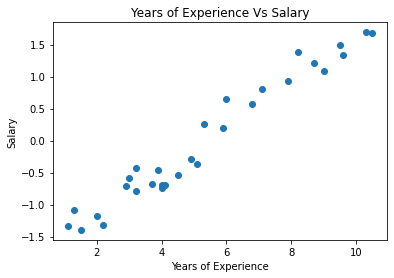

In [88]:
plt.scatter(x,y)
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Years of Experience Vs Salary")
plt.show()

In [89]:
def gradientDescent(x,y,numOfIterations):
    alpha = 0.001
    theta1 = 0
    theta0 = 0
    for i in range(numOfIterations):
        temp0 = theta0 - alpha*sum((theta0 + theta1*x - y))/len(x)
        temp1 = theta1 - alpha*sum((theta0 + theta1*x - y)*x)/len(x)
        theta0 = temp0
        theta1 = temp1
    return theta0,theta1
    

In [90]:
theta0 , theta1 = gradientDescent(x,y,4000)
theta0 , theta1


(-1.0411806480329946, 0.2274206342980903)

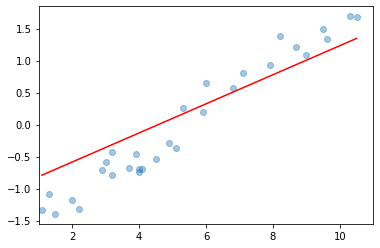

In [91]:
# best fit line 
plt.scatter(x,y,alpha=0.4)
plt.plot(x,theta0 + theta1*x,c="red")
plt.xlim(1,11)
plt.show()


In [92]:
def predict(x,theta0,theta1):
    return (theta0 + x*theta1)*27414.429785 + 76003.000000


In [93]:
 predict(12,theta0=theta0,theta1=theta1)


122274.91035850058

In [94]:
def normal_form(x,y):
    x = np.transpose(x)
    y = np.transpose(y)
    one = np.ones(len(x))
    X = np.vstack((one,x)).T
    inv = np.linalg.inv(np.dot(X.T,X))
    Y = np.dot(inv,X.T)
    thetas = np.dot(Y,y)
    print(thetas)  


In [95]:
normal_form(x,y)

[-1.83154639  0.3447076 ]
